In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from matplotlib.pyplot import figure
import pylab
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier


In [6]:
#INTRODUCTION/EDA:
df = pd.read_csv(r"C:\Users\weizi\Desktop\IE 517\final\MLF_GP1_CreditScore.csv")


In [7]:
df.head()

,Sales/Revenues,Gross Margin,EBITDA,EBITDA Margin,Net Income Before Extras,Total Debt,Net Debt,LT Debt,ST Debt,Cash,...,Interest Coverage,Total Liquidity,Current Liquidity,Current Liabilities,EPS Before Extras,PE,ROA,ROE,InvGrd,Rating
0,-0.005496,0.030763,0.018885,0.024515,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.136748,0.392143,-0.184887,0.062781,0.148305,0.100409,0.163266,0.102521,1,A1
1,-0.005496,0.030763,0.088716,0.094733,0.146849,-0.029710,-0.019296,-0.042648,0.049875,-0.133716,...,0.214657,0.392143,-0.184887,0.062781,0.148305,-0.089598,0.163266,0.102521,1,A1
2,-0.007045,0.023159,0.088716,0.096440,0.108590,0.039410,0.034268,0.009059,0.250371,0.101315,...,0.205290,0.483257,-0.017877,0.121357,0.110656,-0.045142,0.105711,0.103378,1,A1
3,-0.009396,0.028400,0.088716,0.099046,0.146137,0.030071,0.036938,-0.016964,0.356994,-0.052606,...,0.232991,0.996955,-0.122017,0.079051,0.151639,-0.008231,0.162421,0.132295,1,A1
4,-0.009009,0.027714,0.088716,0.098611,0.123500,0.024224,0.034445,-0.034132,0.461894,-0.090869,...,0.172906,1.711426,-0.161561,0.084319,0.130435,0.015528,0.156427,0.225144,1,A1


In [8]:
df.shape

(1700, 28)

In [9]:
# 1.1 Generate descriptive statistics:
descriptive_stat = df.describe()

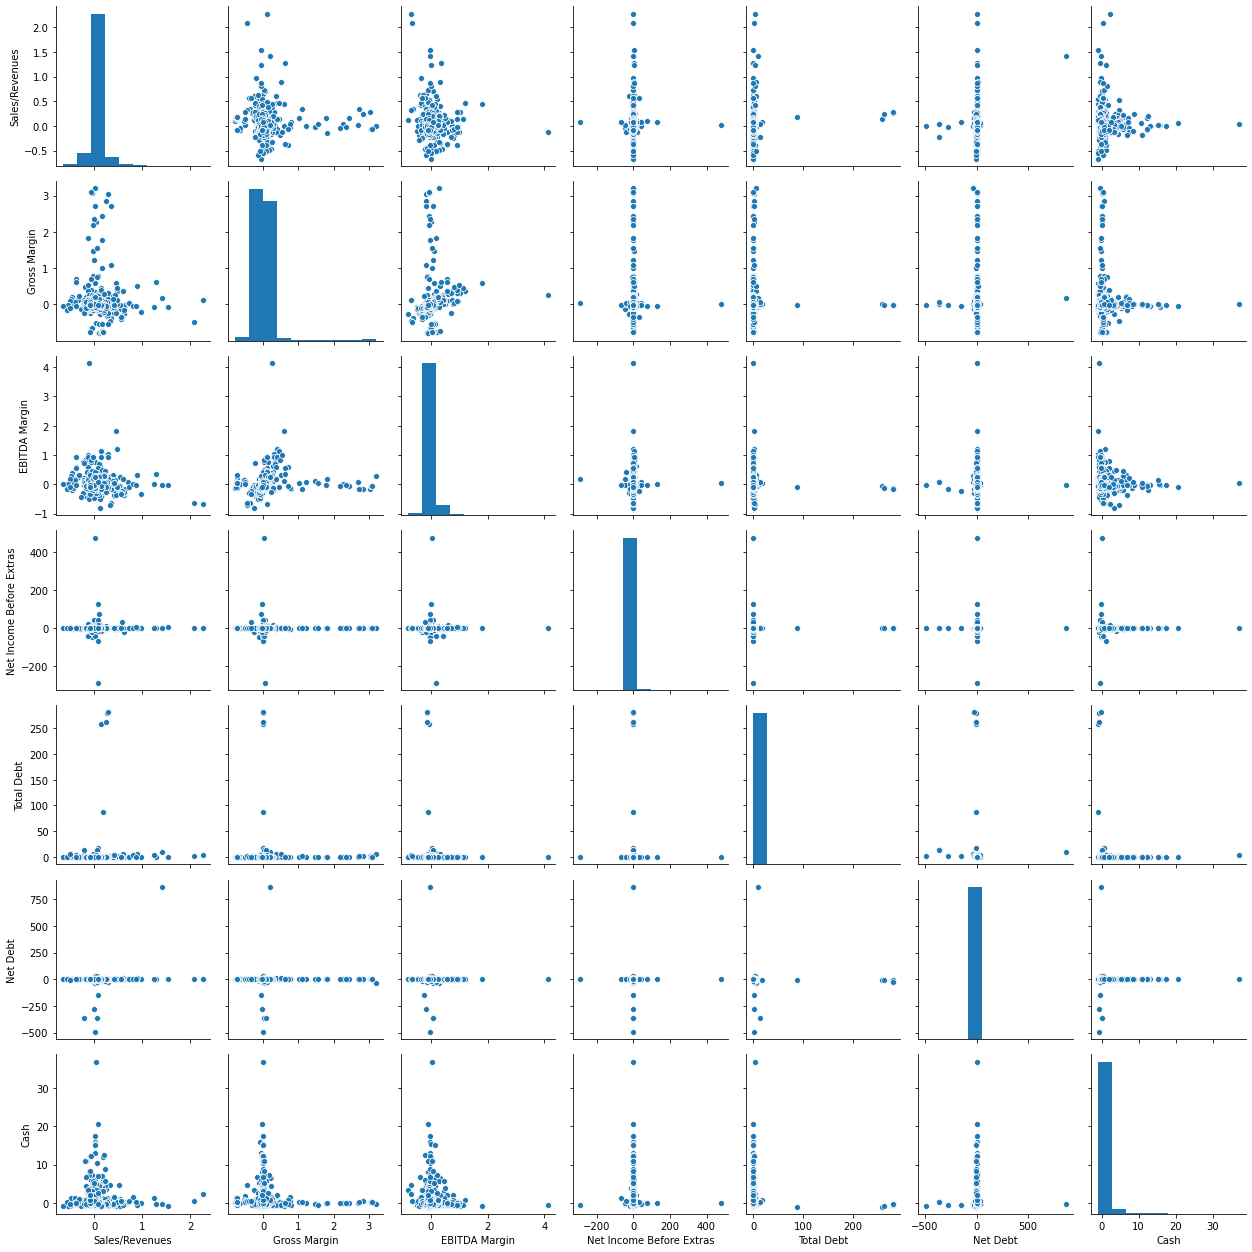

In [10]:
#1.2 Scatterplot matrix (visualizing the pair-wise correlation between
#different features):

cols = ['Sales/Revenues','Gross Margin','EBITDA Margin','Net Income Before Extras', 'Total Debt', 'Net Debt', 'Cash']
sns.pairplot(df[cols], height = 2.5)

#minimize the white space
plt.tight_layout()
# plt.savefig('images/10_03.png', dpi=300)
plt.show()

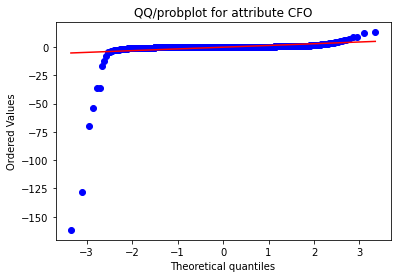

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111)
stats.probplot(df['CFO'], dist="norm", plot=pylab)
ax.set_title("QQ/probplot for attribute CFO")
pylab.show()

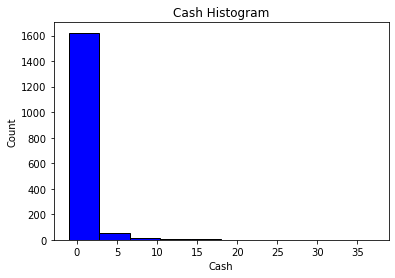

In [12]:
plt.hist(df['Cash'],color='blue',ec='black')
plt.title('Cash Histogram')
plt.xlabel('Cash')
plt.ylabel('Count')
plt.show()


In [13]:
#Multiclass classification:

#Define credit score features
features_Credit_Score = df.iloc[:,0:26]

#Define investment ratings
target_Investment_Ratings = df.iloc[:,27]
target_Investment_Ratings

0         A1
1         A1
2         A1
3         A1
4         A1
        ... 
1695    Caa1
1696    Caa1
1697    Caa1
1698    Caa1
1699    Caa1
Name: Rating, Length: 1700, dtype: object

In [70]:
#Convert Moody's rating strings into numbers:

ratings_num = {'A1':1, 'A2':1, 'A3':1,'Aa2':1,'Aa3':1, 'Aaa':1, 'B1':3,
               'B2':3, 'B3':3, 'Ba1':3,'Ba2':3, 'Ba3':3,'Baa1':2, 
              'Baa2':2, 'Baa3':2, 'Caa1':3}

#map the number rating to the string rating
rating = df['Rating'].map(ratings_num)
rating

0       1
1       1
2       1
3       1
4       1
       ..
1695    3
1696    3
1697    3
1698    3
1699    3
Name: Rating, Length: 1700, dtype: int64

In [71]:
# multiclass classification for Investment Ratings


X_train, X_test, y_train, y_test = train_test_split(features_Credit_Score, 
                                                    rating,
                                                    test_size=0.2, random_state=1)

scaler = preprocessing.StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [72]:
X_train

array([[-7.90615694e-03, -5.93454125e-02, -2.62491774e-01, ...,
        -6.02242291e-02, -2.35343677e-02, -1.64010380e-03],
       [ 1.61997635e-01, -7.26606230e-02,  2.27807055e-01, ...,
        -8.73483601e-02,  4.11058688e-03,  1.42385915e-02],
       [ 3.08020369e-01, -9.30492637e-02,  2.31100982e-01, ...,
        -5.05565438e-02, -1.44416232e-02,  3.35981723e-03],
       ...,
       [-2.03119967e-01,  5.28101783e-02,  3.45361522e-01, ...,
        -5.33545710e-02, -6.84861042e-03,  4.80526073e-03],
       [ 1.86648238e-02,  2.19285779e-02, -2.44696331e-02, ...,
         7.26515140e-03, -3.07810830e-02,  4.35618037e-03],
       [-2.59808153e+00, -2.58590603e-01, -2.06504594e+00, ...,
         4.71551573e-03, -5.08822964e-02,  2.30634229e-02]])

In [73]:
X_test

array([[-0.11266187, -0.11526287, -0.27297884, ..., -0.04495121,
        -0.01701719, -0.00183731],
       [-0.12044964, -0.12576497, -0.11846261, ..., -0.05666475,
        -0.01697453,  0.00371478],
       [ 0.08406799, -0.20123701, -1.37820955, ..., -0.17447077,
        -0.19468548, -0.16400115],
       ...,
       [-0.604605  , -0.31154431, -1.07020323, ..., -0.07229695,
        -0.04538093, -0.01636329],
       [-0.28741672, -0.10865186, -0.44968397, ..., -0.0478055 ,
        -0.02219622,  0.0041779 ],
       [-0.99045312, -0.31942791, -1.24007381, ..., -0.16505382,
        -0.22134719, -0.20098255]])

In [74]:
y_train

228     1
1540    2
1010    2
779     3
286     1
       ..
715     3
905     3
1096    2
235     1
1061    2
Name: Rating, Length: 1360, dtype: int64

In [75]:
y_test

1549    2
898     3
1397    2
921     3
612     3
       ..
1047    2
1057    2
1304    2
1466    2
650     3
Name: Rating, Length: 340, dtype: int64

In [76]:
# explained variance plot befor PCA
cov_matrix=np.cov(X_train.T)
eigenvalues,eigenvectors=np.linalg.eig(cov_matrix)

print(eigenvalues)
sorted(eigenvalues,reverse=True)

tot = sum(eigenvalues)

part=0
dimension=0

# 95% is set for principal components choice
while part/tot<0.95:
    part=part+eigenvalues[dimension]
    dimension=dimension+1
percentage=part/tot
print("we need",dimension,"components to get 95% or above of the information")

[3.76084434e+00 2.97290468e+00 2.87965686e+00 2.03813038e+00
 1.99851743e+00 1.99976674e+00 1.55011167e+00 1.11865367e+00
 1.00193732e+00 9.94226330e-01 9.80305972e-01 9.54123688e-01
 8.85121145e-01 7.88238870e-01 7.45061652e-01 4.17986721e-01
 3.66289338e-01 2.45834057e-01 2.03891719e-01 4.75558913e-02
 3.47593920e-02 1.49344344e-02 9.42805693e-03 7.46838196e-03
 3.84584836e-04 2.99839688e-03]
we need 16 components to get 95% or above of the information


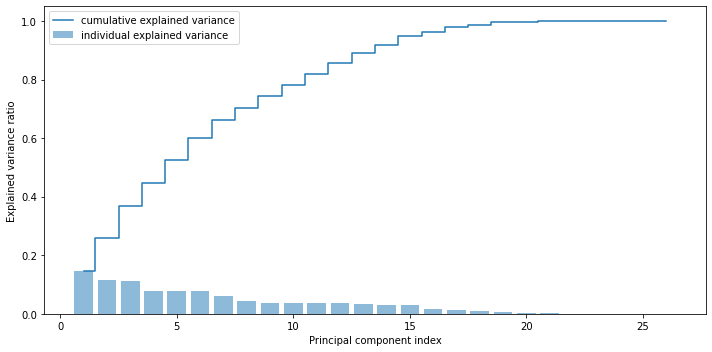

In [77]:
var_exp = [(i / tot) for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.figure(figsize=(10,5))
plt.bar(range(1, 27), var_exp, alpha=0.5, align='center',label='individual explained variance')
plt.step(range(1, 27), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#PCA transformation
pca=PCA(n_components=15)

X_train=pca.fit_transform(X_train)
X_test=pca.transform(X_test)

# we only take 15 components for training
#X_train, X_test is already transformed


In [86]:
# model A: KNN
print("KNN classification")

knn=KNeighborsClassifier(n_neighbors = 1, p = 2, metric='minkowski', algorithm='auto')

parameters={"n_neighbors":range(1,25)}

#Use bagging to reduce overfitting by drawing random combinations
#of the training set with repetition

#bag = BaggingClassifier(base_estimator=tree, n_estimators=500,max_samples=1.0, 
#                        max_features=1.0, bootstrap=True, 
 #                       bootstrap_features=False, n_jobs=1, 
  #                      random_state=1)


#knn_train = bag.predict(X_train)
#knn_test = bag.predict(X_test)



knn_grid=GridSearchCV(knn,parameters,cv=10)

knn_grid.fit(X_train,y_train)

print("the best n_neighbors is",knn_grid.best_params_["n_neighbors"])

print("in_sample accuracy is",knn_grid.best_score_)

y_predict=knn_grid.predict(X_test)

print("out_of_sample accuracy is",accuracy_score(y_test,y_predict))

print("\n")

KNN classification
the best n_neighbors is 1
in_sample accuracy is 0.6058823529411764
out_of_sample accuracy is 0.6088235294117647




In [79]:
# model B: Decision Tree
print("Decision Tree classification")
from sklearn.tree import DecisionTreeClassifier

parameters={"criterion":["gini","entropy"],"max_depth":range(1,51)}

tree = DecisionTreeClassifier()






tree_grid = GridSearchCV(tree,parameters,cv=10)

tree_grid.fit(X_train,y_train)

print("the best parameters are",tree_grid.best_params_)

print("in_sample accuracy is",tree_grid.best_score_)

y_predict = tree_grid.predict(X_test)

print("the out_of_sample accurancy is",accuracy_score(y_test,y_predict))

print("\n")


Decision Tree classification
the best parameters are {'criterion': 'gini', 'max_depth': 41}
in_sample accuracy is 0.524264705882353
the out_of_sample accurancy is 0.5205882352941177




In [80]:
#modle C: Logistic Regression
print("Logistic Regression")
from sklearn.linear_model import LogisticRegression

#in all solvers, only liblinear support L1 penalty

log_reg=LogisticRegression(solver="liblinear")

parameters={"penalty":["l1","l2"]}

log_reg_grid=GridSearchCV(log_reg,parameters,cv=10)

log_reg_grid.fit(X_train,y_train)

print("the best parameters are",log_reg_grid.best_params_)

print("in_sample accuracy is",log_reg_grid.best_score_)

y_predict = log_reg_grid.predict(X_test)

print("the out_of_sample accurancy is",accuracy_score(y_test,y_predict))

print("\n")

Logistic Regression
the best parameters are {'penalty': 'l2'}
in_sample accuracy is 0.44411764705882356
the out_of_sample accurancy is 0.46176470588235297




In [89]:
# ensembling

print("Random Forest")

from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier(n_jobs=-1)
parameters={"criterion":["gini","entropy"],"n_estimators":[10,25,50,100,250,500,750,1000],"max_depth":range(1,21)}

forest_grid=GridSearchCV(forest,parameters,cv=10)

forest_grid.fit(X_train,y_train)

print("the best parameters are",forest_grid.best_params_)

print("in_sample accuracy is",forest_grid.best_score_)

y_predict = forest_grid.predict(X_test)

print("the out_of_sample accurancy is",accuracy_score(y_test,y_predict))

Random Forest
the best parameters are {'criterion': 'entropy', 'max_depth': 18, 'n_estimators': 250}
in_sample accuracy is 0.626470588235294
the out_of_sample accurancy is 0.6058823529411764
